In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import OrthogonalMatchingPursuit
import copy
from collections import Counter

In [260]:
def bin_to_pattern(x):
    return [ [1-int(i), int(i)] for i in x ]
def create_specific_patterns(mode1,mode2,size):
    pats =[]
    for i in range(2):
        for j in range(2):
            pats.append( [[1,1]]*mode1 + bin_to_pattern(str(i)) + [[1,1]]*(mode2-mode1-1) + bin_to_pattern(str(j)) + [[1,1]]*(size-mode1-(mode2-mode1-1)-2) )
    return pats
def create_specific_patterns3(mode1,mode2,mode3,size):
    pats =[]
    for i in range(2):
        for j in range(2):
            for k in range(2):
                pats.append( [[1,1]]*mode1 + bin_to_pattern(str(i)) + [[1,1]]*(mode2-mode1-1) + bin_to_pattern(str(j)) + [[1,1]]*(mode3-(mode2-mode1-1)-mode1-2) + bin_to_pattern(str(k)) + [[1,1]]*(size -mode1-(mode2-mode1-1)-(mode3-(mode2-mode1-1)-mode1-2)-3) )
    return pats
def create_specific_patterns4(mode1,mode2,mode3,mode4,size):
    pats = []
    temp_pats = create_specific_patterns3(mode1,mode2,mode3,size)
    for p in temp_pats:
        for k in range(2):
            p_prime = copy.deepcopy(p)
            p_prime[mode4] = bin_to_pattern(str(k))[0]
            pats.append(p_prime)
    return pats
def create_specific_patterns5(mode1, mode2, mode3, mode4, mode5, size):
    """
    Generate specific patterns for 5 modes.
    """
    pats = []
    temp_pats = create_specific_patterns4(mode1, mode2, mode3, mode4, size)
    for p in temp_pats:
        for k in range(2):
            p_prime = copy.deepcopy(p)
            p_prime[mode5] = bin_to_pattern(str(k))[0]
            pats.append(p_prime)
    return pats
def create_specific_patterns8(mode1, mode2, mode3, mode4, mode5, mode6, mode7, mode8, size):
    """
    Generate specific patterns for 8 modes.
    """
    pats = []
    temp_pats = create_specific_patterns5(mode1, mode2, mode3, mode4, mode5, size)
    for p in temp_pats:
        for k in range(2):
            p_prime = copy.deepcopy(p)
            p_prime[mode6] = bin_to_pattern(str(k))[0]
            for l in range(2):
                p_prime2 = copy.deepcopy(p_prime)
                p_prime2[mode7] = bin_to_pattern(str(l))[0]
                for m in range(2):
                    p_prime3 = copy.deepcopy(p_prime2)
                    p_prime3[mode8] = bin_to_pattern(str(m))[0]
                    pats.append(p_prime3)
    return pats
def dev_pattern(pat):
    f = np.array([1])
    for i in pat:
        f = np.kron(f,i)
    return f

<h2>Game modeling</h2>

In [3]:
def stringify(seq):
    string = ''
    for n in seq:
        string+=str(n)
    return string

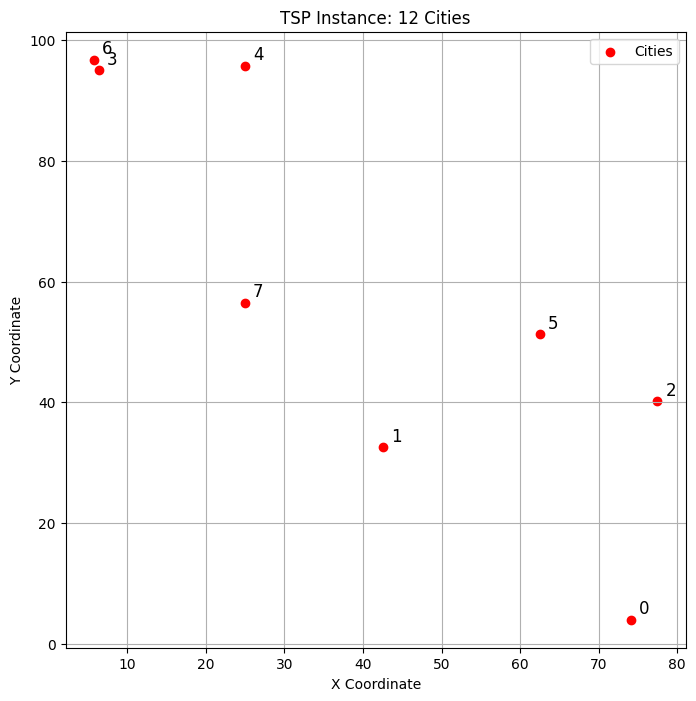

Distance Matrix:
[[  0.          42.61844655  36.30865556 113.51036721 104.10303705
   48.66801271 115.24366005  71.93175414]
 [ 42.61844655   0.          35.75457423  72.17973046  65.5752389
   27.38313599  73.96146235  29.6649654 ]
 [ 36.30865556  35.75457423   0.          89.8446506   76.46753621
   18.60677986  91.37537687  55.01446605]
 [113.51036721  72.17973046  89.8446506    0.          18.67050808
   71.24129816   1.81028846  42.81688755]
 [104.10303705  65.5752389   76.46753621  18.67050808   0.
   58.23254012  19.29274382  39.30493438]
 [ 48.66801271  27.38313599  18.60677986  71.24129816  58.23254012
    0.          72.77759715  37.97411744]
 [115.24366005  73.96146235  91.37537687   1.81028846  19.29274382
   72.77759715   0.          44.61777639]
 [ 71.93175414  29.6649654   55.01446605  42.81688755  39.30493438
   37.97411744  44.61777639   0.        ]]


In [80]:
def generate_tsp_instance(num_cities, seed=None):
    """
    Generate an instance of the Traveling Salesman Problem (TSP) with random city coordinates.
    
    Args:
        num_cities (int): Number of cities.
        seed (int, optional): Random seed for reproducibility.
    
    Returns:
        tuple: A tuple containing:
            - coordinates (ndarray): Array of shape (num_cities, 2) with city coordinates.
            - distance_matrix (ndarray): Array of shape (num_cities, num_cities) with pairwise distances.
    """
    if seed is not None:
        np.random.seed(seed)
    
    # Generate random coordinates for cities
    coordinates = np.random.rand(num_cities, 2) * 100  # Scale to a 100x100 grid
    
    # Compute the distance matrix
    distance_matrix = np.zeros((num_cities, num_cities))
    for i in range(num_cities):
        for j in range(num_cities):
            distance_matrix[i, j] = np.linalg.norm(coordinates[i] - coordinates[j])
    
    return coordinates, distance_matrix

# Generate TSP instance
coordinates, distance_matrix = generate_tsp_instance(num_cities=8, seed=398)

# Plot the cities
plt.figure(figsize=(8, 8))
plt.scatter(coordinates[:, 0], coordinates[:, 1], c='red', label='Cities')
for i, (x, y) in enumerate(coordinates):
    plt.text(x + 1, y + 1, str(i), fontsize=12)
plt.title("TSP Instance: 12 Cities")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.grid()
plt.show()

# Print the distance matrix
print("Distance Matrix:")
print(distance_matrix)

In [241]:
n = 13
# sequence_list = np.array([np.array(list(bin(i)[3:]),dtype=np.int32) for i in range(2**n, 2**(n+1))])
# len(sequence_list)
from itertools import permutations

def enumerate_permutations(size):
    """
    Enumerate all permutations of the values 0 to 7.
    
    Returns:
        list: A list of tuples, where each tuple is a permutation of the values 0 to 7.
    """
    values = range(size)  # Values from 0 to 7
    all_permutations = list(permutations(values))
    all_permutations = [perm for perm in all_permutations if perm[0] == 0]
    return all_permutations

# Example usage
route_list = enumerate_permutations(8)
len(route_list)

5040

In [83]:
def estimate_cost(route, distance_matrix):
    """
    Compute the total distance of a given route in the Traveling Salesman Problem (TSP).
    
    Args:
        route (list): A list of city indices representing the order of the route.
        distance_matrix (ndarray): A 2D array where distance_matrix[i][j] represents the distance between city i and city j.
    
    Returns:
        float: The total distance of the route.
    """
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += distance_matrix[route[i]][route[i + 1]]
    # Add the distance to return to the starting city
    return total_distance

In [466]:
def monte_carlo_compressive_learning(Phi,sequence_cost,sample_size=200,threshold=20):

    #Sample
    sample_index = np.random.randint(0,len(sequence_cost),sample_size)
    sequence_cost_spectrum = np.zeros_like(sequence_cost)
    sequence_cost_spectrum[sample_index] = sequence_cost[sample_index]

    #Threshold
    sequence_cost_spectrum[sequence_cost_spectrum<threshold]=0
    non_zero_elements = sequence_cost_spectrum[sequence_cost_spectrum != 0]
    print(len(non_zero_elements))

    #Measurements
    y = []
    y = np.array(Phi * np.matrix(sequence_cost_spectrum).T).T[0]
    y = np.array(y)

    #Matching pursuit
    try:
        omp = OrthogonalMatchingPursuit(n_nonzero_coefs=10)
        omp.fit(Phi, y)
        coefficients = [ i if i>0 else 0 for i in omp.coef_]
    except:
        pass

    return coefficients

<h2>Naive Test</h2>

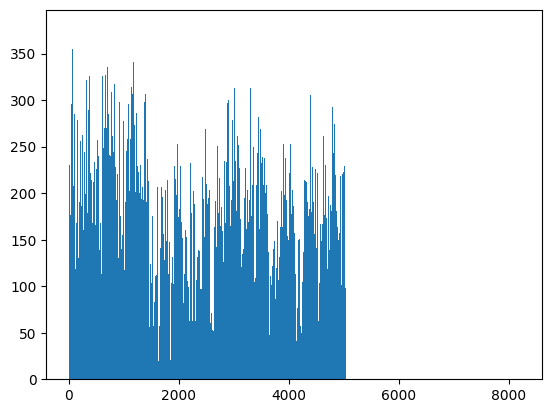

1100
378.25073226857376
(0, 2, 5, 1, 7, 4, 3, 6)


In [221]:
n=13
sequence_cost = []
for route in route_list:
    sequence_cost.append(estimate_cost(route,distance_matrix))
sequence_cost = 550 - np.array(sequence_cost)
sequence_cost = np.pad(sequence_cost, (0, 2**n - len(sequence_cost)), mode='constant', constant_values=0)

plt.bar([i for i in np.arange(len(sequence_cost))],sequence_cost,width=1.5)
plt.show()
ma = np.argmax(sequence_cost)
print(ma)
print(sequence_cost[ma])
print(route_list[ma])

In [235]:
from scipy.optimize import dual_annealing

# Define the objective function
def my_f(x):
    """
    Objective function to minimize.
    Converts x to an integer index and returns the negative sequence cost.
    """
    x = int(round(x[0]))  # Ensure x is a single integer index
    if 0 <= x < len(sequence_cost):  # Check bounds
        return -sequence_cost[x]
    else:
        return float('inf')  # Return a large value if out of bounds

# Define bounds for the single-dimensional problem
bounds = [(0, len(sequence_cost) - 1)]  # Single-dimensional bounds

# Perform dual annealing optimization
results = []
for _ in range(200):
    res = dual_annealing(my_f, bounds=bounds, maxiter=400,no_local_search=True)
    # print("Optimization result:", res)
    results.append(int(round(res.x[0])) in np.argpartition(sequence_cost, -20)[-20:])
np.average(results)

0.99

In [224]:
#Random
Phi = np.random.rand(250,2**n)
thresh = 295 

res = []
for _ in range(300):
    coefficients = monte_carlo_compressive_learning(Phi,sequence_cost,threshold=thresh,sample_size=400)
    good_opt = np.intersect1d(np.argpartition(sequence_cost, -20)[-20:],np.nonzero(coefficients)[0])
    res.append(1 if len(good_opt) > 0 else 0)
np.average(res)

0.7566666666666667

In [225]:
#Nearest neighbor quadruplets
all_pat = []
for i in range(n-3):
    all_pat += create_specific_patterns4(i,i+1,i+2,i+3,n)
Phi = np.array([dev_pattern(p) for p in all_pat])
thresh = 295 

res = []
for _ in range(200):
    coefficients = monte_carlo_compressive_learning(Phi,sequence_cost,threshold=thresh,sample_size=400)
    good_opt = np.intersect1d(np.argpartition(sequence_cost, -20)[-20:],np.nonzero(coefficients)[0])
    res.append(1 if len(good_opt) > 0 else 0)
np.average(res)

0.325

In [226]:
#Nearest neighbor quintuplets
all_pat = []
for i in range(n-4):
    all_pat += create_specific_patterns5(i,i+1,i+2,i+3,i+4,n)
Phi = np.array([dev_pattern(p) for p in all_pat])
thresh = 295 

res = []
for _ in range(200):
    coefficients = monte_carlo_compressive_learning(Phi,sequence_cost,threshold=thresh,sample_size=400)
    good_opt = np.intersect1d(np.argpartition(sequence_cost, -20)[-20:],np.nonzero(coefficients)[0])
    res.append(1 if len(good_opt) > 0 else 0)
np.average(res)

0.495

In [227]:
#Nearest neighbor pairs
all_pat = []
for i in range(n-1):
    all_pat += create_specific_patterns(i,i+1,n)
Phi = np.array([dev_pattern(p) for p in all_pat])
thresh = 295 

res = []
for _ in range(200):
    coefficients = monte_carlo_compressive_learning(Phi,sequence_cost,threshold=thresh,sample_size=400)
    good_opt = np.intersect1d(np.argpartition(sequence_cost, -20)[-20:],np.nonzero(coefficients)[0])
    res.append(1 if len(good_opt) > 0 else 0)
np.average(res)

0.105

In [228]:
#All pairs
all_pat = []
all_pat = []
for i in range(n):
    for j in range(i+1,n):
        all_pat += create_specific_patterns(i,j,n)
Phi = np.array([dev_pattern(p) for p in all_pat])
thresh = 295 

res = []
for _ in range(200):
    coefficients = monte_carlo_compressive_learning(Phi,sequence_cost,threshold=thresh,sample_size=400)
    good_opt = np.intersect1d(np.argpartition(sequence_cost, -20)[-20:],np.nonzero(coefficients)[0])
    res.append(1 if len(good_opt) > 0 else 0)
np.average(res)

0.205

In [229]:
#Nearest neighbor triplets
all_pat = []
for i in range(n-2):
    all_pat += create_specific_patterns3(i,i+1,i+2,n)
Phi = np.array([dev_pattern(p) for p in all_pat])
thresh = 295 

res = []
for _ in range(200):
    coefficients = monte_carlo_compressive_learning(Phi,sequence_cost,threshold=thresh,sample_size=400)
    good_opt = np.intersect1d(np.argpartition(sequence_cost, -20)[-20:],np.nonzero(coefficients)[0])
    res.append(1 if len(good_opt) > 0 else 0)
np.average(res)

0.225

In [231]:
#All quadruplets
all_pat = []
for i in range(n):
    for j in range(i+1,n):
        for k in range(j+1,n):
            for l in range(k+1,n):
                all_pat += create_specific_patterns4(i,j,k,l,n)
Phi = np.array([dev_pattern(p) for p in all_pat])
thresh = 295 

res = []
for _ in range(10):
    coefficients = monte_carlo_compressive_learning(Phi,sequence_cost,threshold=thresh,sample_size=400)
    good_opt = np.intersect1d(np.argpartition(sequence_cost, -20)[-20:],np.nonzero(coefficients)[0])
    res.append(1 if len(good_opt) > 0 else 0)
np.average(res)

0.3

In [233]:
#Nearest neighbor octuplets
all_pat = []
for i in range(n-7):
    all_pat += create_specific_patterns8(i,i+1,i+2,i+3,i+4,i+5,i+6,i+7,n)
Phi = np.array([dev_pattern(p) for p in all_pat])
thresh = 295 

res = []
for _ in range(100):
    coefficients = monte_carlo_compressive_learning(Phi,sequence_cost,threshold=thresh,sample_size=400)
    good_opt = np.intersect1d(np.argpartition(sequence_cost, -20)[-20:],np.nonzero(coefficients)[0])
    res.append(1 if len(good_opt) > 0 else 0)
np.average(res)

0.76

<h2>Structure optimized Test</h2>

In [687]:
def create_specific_patterns_dit_version(mode1,mode2,size):
    pats =[]
    for i in range(6):
        for j in range(6):
            pats.append( [[1,1,1,1,1,1]]*mode1 + [[1 if i==0 else 0,1 if i==1 else 0,1 if i==2 else 0,1 if i==3 else 0,1 if i==4 else 0,1 if i==5 else 0]] + [[1,1,1,1,1,1]]*(mode2-mode1-1) + [[1 if j==0 else 0,1 if j==1 else 0,1 if j==2 else 0,1 if j==3 else 0,1 if j==4 else 0,1 if j==5 else 0]] + [[1,1,1,1,1,1]]*(size-mode1-(mode2-mode1-1)-2) )
    return pats

In [712]:
def create_specific_patterns6_dit_version(mode1, mode2, mode3, mode4, mode5, mode6, size):
    """
    Generate specific patterns for 6 modes in the same way create_specific_patterns3 generalizes create_specific_patterns.

    Args:
        mode1, mode2, mode3, mode4, mode5, mode6 (int): Indices of the modes to modify.
        size (int): Total size of the pattern.

    Returns:
        list: A list of patterns with 6 modes modified.
    """
    pats = []
    for i in range(6):
        for j in range(6):
            for k in range(6):
                for l in range(6):
                    for m in range(6):
                        for n in range(6):
                            pats.append(
                                [[1, 1, 1, 1, 1, 1]] * mode1 +
                                [[1 if i == x else 0 for x in range(6)]] +
                                [[1, 1, 1, 1, 1, 1]] * (mode2 - mode1 - 1) +
                                [[1 if j == x else 0 for x in range(6)]] +
                                [[1, 1, 1, 1, 1, 1]] * (mode3 - mode2 - 1) +
                                [[1 if k == x else 0 for x in range(6)]] +
                                [[1, 1, 1, 1, 1, 1]] * (mode4 - mode3 - 1) +
                                [[1 if l == x else 0 for x in range(6)]] +
                                [[1, 1, 1, 1, 1, 1]] * (mode5 - mode4 - 1) +
                                [[1 if m == x else 0 for x in range(6)]] +
                                [[1, 1, 1, 1, 1, 1]] * (mode6 - mode5 - 1) +
                                [[1 if n == x else 0 for x in range(6)]] +
                                [[1, 1, 1, 1, 1, 1]] * (size - mode6 - 1)
                            )
    return pats

In [689]:
num_cities = 6
N = int(num_cities**(num_cities))
n= round(np.log2(N))

coordinates, distance_matrix = generate_tsp_instance(num_cities=num_cities, seed=38)
route_list = np.array(enumerate_permutations(size=num_cities))
print(N)
print(n)
len(route_list)

46656
16


120

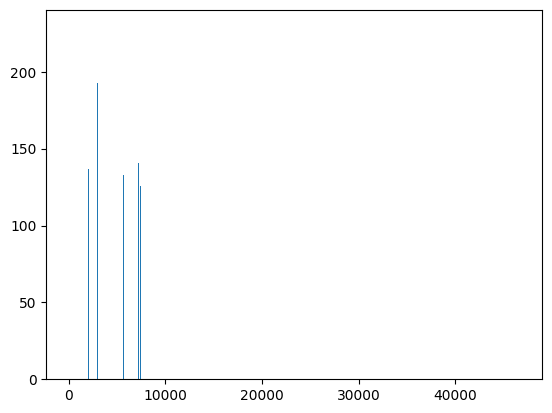

1930
228.93581105145498


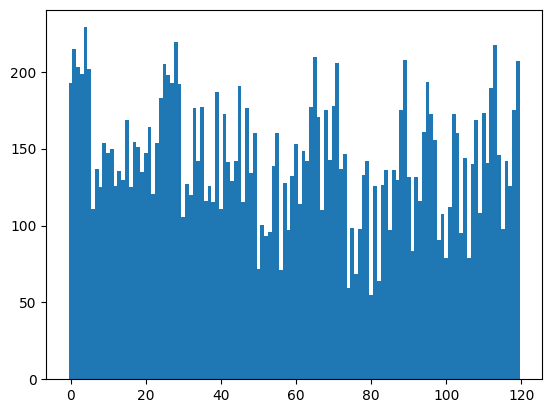

In [690]:
def compute_pos_of_one(route,num_cities):
    ind = route[1]
    for city in route[2:]:
        ind = ind * num_cities + city
    return ind

relevant_route_index = []
sequence_cost = []
for route in route_list:
    relevant_route_index.append(compute_pos_of_one(route,num_cities))
    sequence_cost.append(estimate_cost(route,distance_matrix))
relevant_route_index = np.array(relevant_route_index)
sequence_cost = 400 - np.array(sequence_cost)

structured_cost_spectrum = np.zeros(N)
structured_cost_spectrum[relevant_route_index] = sequence_cost
# structured_cost_spectrum = np.pad(structured_cost_spectrum, (0, 2**n - len(structured_cost_spectrum)), mode='constant', constant_values=0)

plt.bar(np.arange(N),structured_cost_spectrum,width=5)
plt.show()
ma = np.argmax(structured_cost_spectrum)
print(ma)
print(structured_cost_spectrum[ma])

plt.bar(np.arange(len(route_list)),sequence_cost,width=1)
plt.show()

In [691]:
def monte_carlo_compressive_learning_structured(Phi,sequence_cost,structured_cost_spectrum,sample_size=200,threshold=20):

    #Sample
    sample_index = np.random.randint(0,len(route_list),sample_size).astype(int)
    structure_sample_index = [compute_pos_of_one(route,num_cities) for route in route_list[sample_index]]

    sequence_cost_spectrum = np.zeros_like(structured_cost_spectrum)
    sequence_cost_spectrum[structure_sample_index] = structured_cost_spectrum[structure_sample_index]

    #Threshold
    sequence_cost_spectrum[sequence_cost_spectrum<threshold]=0
    # non_zero_elements = sequence_cost_spectrum[sequence_cost_spectrum != 0]
    # print(len(non_zero_elements))

    #Measurements
    y = []
    y = np.array(Phi * np.matrix(sequence_cost_spectrum).T).T[0]
    y = np.array(y)

    #Matching pursuit
    try:
        omp = OrthogonalMatchingPursuit(n_nonzero_coefs=10)
        omp.fit(Phi, y)
        coefficients = [ i if i>0 else 0 for i in omp.coef_]
    except:
        pass

    return coefficients

In [707]:
#Random
Phi = np.random.rand(250,N)
thresh = 170

res = []
for _ in range(100):
    coefficients = monte_carlo_compressive_learning_structured(Phi,sequence_cost,structured_cost_spectrum,threshold=thresh,sample_size=20)
    good_opt = np.intersect1d(np.argpartition(structured_cost_spectrum, -5)[-5:],np.nonzero(coefficients)[0])
    # print(good_opt)
    res.append(1 if len(good_opt) > 0 else 0)
np.average(res)

0.68

In [645]:
from scipy.optimize import dual_annealing

# Define the objective function
def my_f(x):
    """
    Objective function to minimize.
    Converts x to an integer index and returns the negative sequence cost.
    """
    x = int(round(x[0]))  # Ensure x is a single integer index
    if 0 <= x < len(sequence_cost):  # Check bounds
        return -sequence_cost[x]
    else:
        return float('inf')  # Return a large value if out of bounds

# Define bounds for the single-dimensional problem
bounds = [(0, len(sequence_cost) - 1)]  # Single-dimensional bounds

# Perform dual annealing optimization
results = []
for _ in range(100):
    res = dual_annealing(my_f, bounds=bounds, maxiter=20,no_local_search=True)
    # print("Optimization result:", res)
    results.append(int(round(res.x[0])) in np.argpartition(sequence_cost, -5)[-5:])
np.average(results)

0.82

In [709]:
#Nearest neighbor 6-dits
all_pat = []
for i in range(num_cities-1):
    all_pat += create_specific_patterns_dit_version(i,i+1,num_cities)
Phi = np.array([dev_pattern(p) for p in all_pat])
thresh = 170

res = []
for _ in range(100):
    coefficients = monte_carlo_compressive_learning_structured(Phi,sequence_cost,structured_cost_spectrum,threshold=thresh,sample_size=20)
    good_opt = np.intersect1d(np.argpartition(structured_cost_spectrum, -5)[-5:],np.nonzero(coefficients)[0])
    # print(good_opt)
    res.append(1 if len(good_opt) > 0 else 0)
np.average(res)

0.39

In [ ]:
#Nearest neighbor 6-dits
all_pat = create_specific_patterns6_dit_version(0,1,2,3,4,5,num_cities)
Phi = np.array([dev_pattern(p) for p in all_pat])
thresh = 170

res = []
for _ in range(1):
    coefficients = monte_carlo_compressive_learning_structured(Phi,sequence_cost,structured_cost_spectrum,threshold=thresh,sample_size=20)
    good_opt = np.intersect1d(np.argpartition(structured_cost_spectrum, -5)[-5:],np.nonzero(coefficients)[0])
    print(good_opt)
#     res.append(1 if len(good_opt) > 0 else 0)
# np.average(res)

In [659]:
#Nearest neighbor pairs
all_pat = []
for i in range(n-1):
    all_pat += create_specific_patterns(i,i+1,n)
Phi = np.array([dev_pattern(p) for p in all_pat])
thresh = 170

res = []
for _ in range(100):
    coefficients = monte_carlo_compressive_learning_structured(Phi,sequence_cost,structured_cost_spectrum,threshold=thresh,sample_size=20)
    good_opt = np.intersect1d(np.argpartition(structured_cost_spectrum, -5)[-5:],np.nonzero(coefficients)[0])
    # print(good_opt)
    res.append(1 if len(good_opt) > 0 else 0)
np.average(res)

0.1

In [660]:
#Nearest neighbor quadruplets
all_pat = []
for i in range(n-3):
    all_pat += create_specific_patterns4(i,i+1,i+2,i+3,n)
Phi = np.array([dev_pattern(p) for p in all_pat])
thresh = 170

res = []
for _ in range(100):
    coefficients = monte_carlo_compressive_learning_structured(Phi,sequence_cost,structured_cost_spectrum,threshold=thresh,sample_size=20)
    good_opt = np.intersect1d(np.argpartition(structured_cost_spectrum, -5)[-5:],np.nonzero(coefficients)[0])
    # print(good_opt)
    res.append(1 if len(good_opt) > 0 else 0)
np.average(res)

0.43

In [665]:
#Nearest neighbor quintuplets
all_pat = []
for i in range(n-4):
    all_pat += create_specific_patterns5(i,i+1,i+2,i+3,i+4,n)
Phi = np.array([dev_pattern(p) for p in all_pat])
thresh = 170

res = []
for _ in range(100):
    coefficients = monte_carlo_compressive_learning_structured(Phi,sequence_cost,structured_cost_spectrum,threshold=thresh,sample_size=20)
    good_opt = np.intersect1d(np.argpartition(structured_cost_spectrum, -5)[-5:],np.nonzero(coefficients)[0])
    # print(good_opt)
    res.append(1 if len(good_opt) > 0 else 0)
np.average(res)

0.5